# 1. Define the Problem
* Objective: Predicting the quality of wine

# 2. Data Collection

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [178]:
import kagglehub

path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/red-wine-quality-cortez-et-al-2009/versions/2


In [179]:
#load the dataset to file path
file_path = '/root/.cache/kagglehub/datasets/uciml/red-wine-quality-cortez-et-al-2009/versions/2/winequality-red.csv'
data = pd.read_csv(file_path)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#3. Data Exploration and Cleaning

In [180]:
# missing values
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [181]:
# datatypes
data.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [182]:
#data infomation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [183]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Visualizing the Distribution of Features

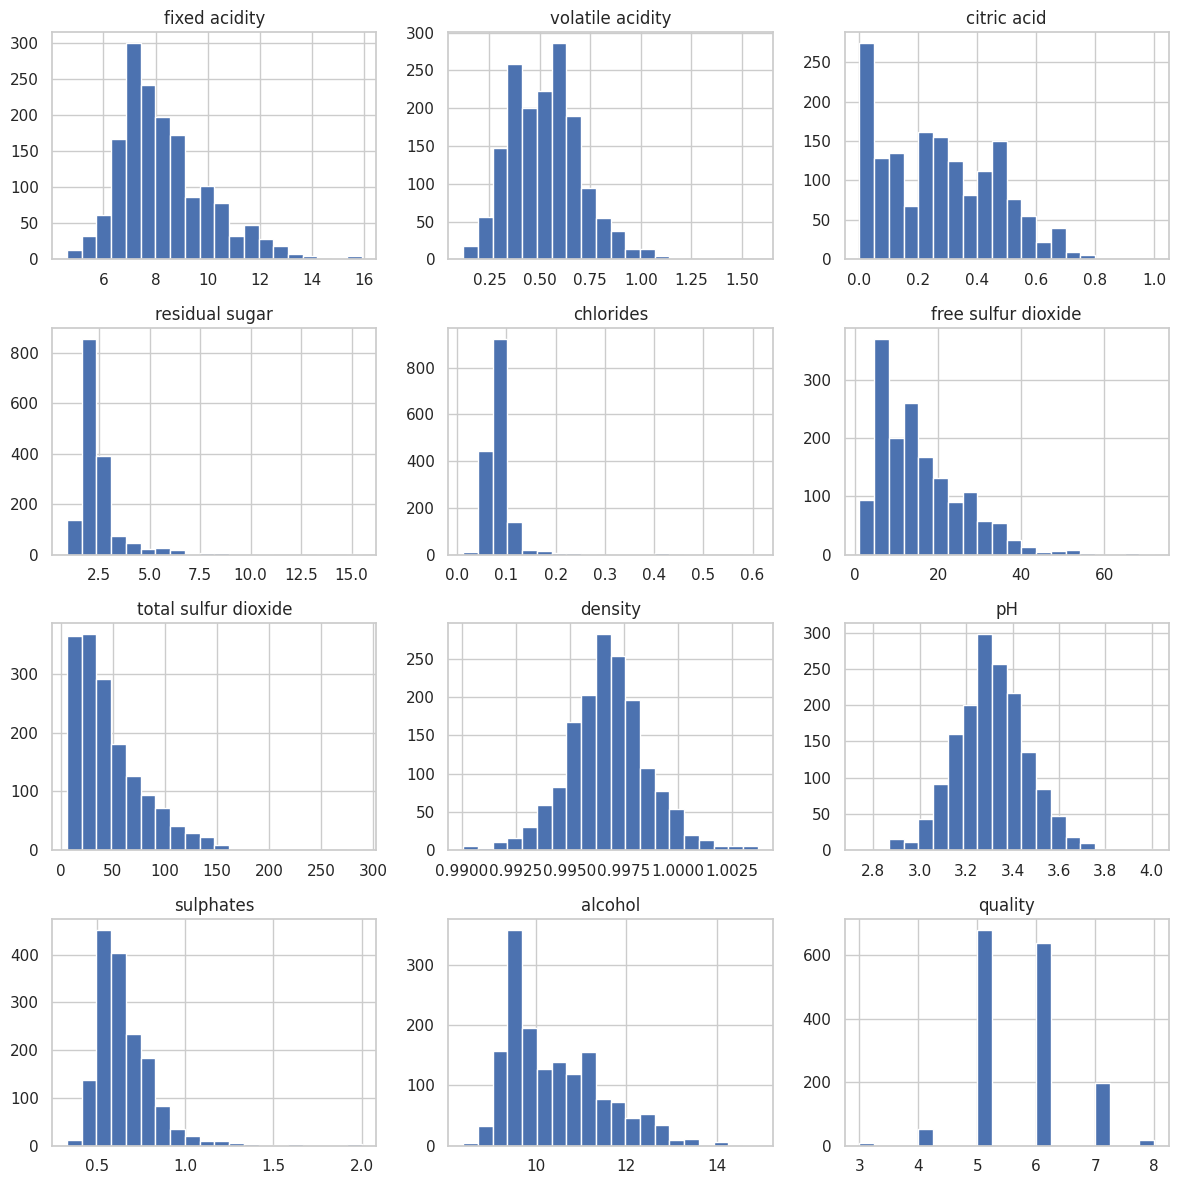

In [184]:
# distribution
sns.set(style="whitegrid")


data.hist(figsize=(12, 12), bins=20)
plt.tight_layout()
plt.show()


# observations from the histograms:

* Fixed acidity, volatile acidity, citric acid: These features seem to have a roughly normal distribution, with some skewness towards lower values.
* Residual sugar, chlorides: These distributions are skewed towards lower values.
* Free sulfur dioxide, total sulfur dioxide: These have a skewed distribution towards higher values.
* Density, pH: These distributions are approximately normal.
* Sulphates: This distribution is skewed towards lower values.
* Alcohol: This distribution is also skewed towards lower values.
* Quality: This feature appears to be discrete, with most wines falling into the 5 and 6 quality categories.

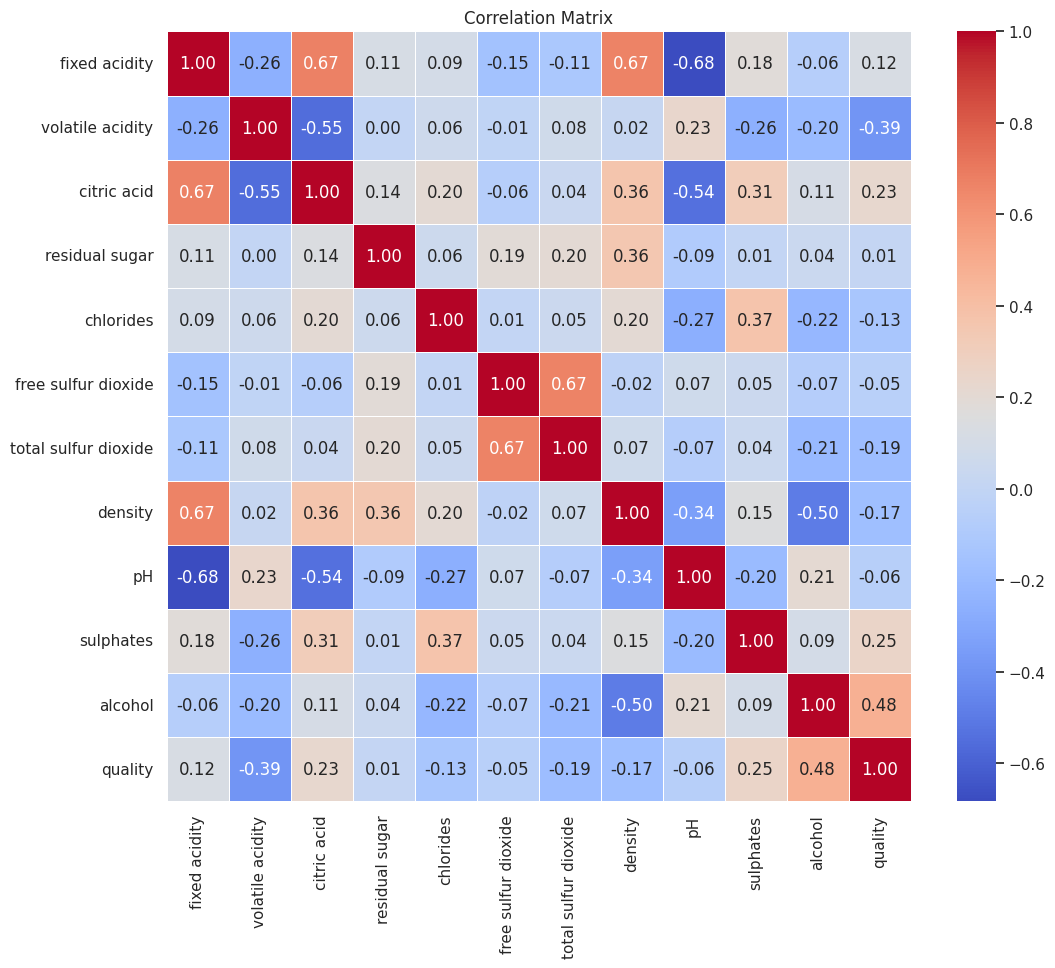

In [185]:
# Calculate the correlation matrix
corr_matrix = data.corr()


plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


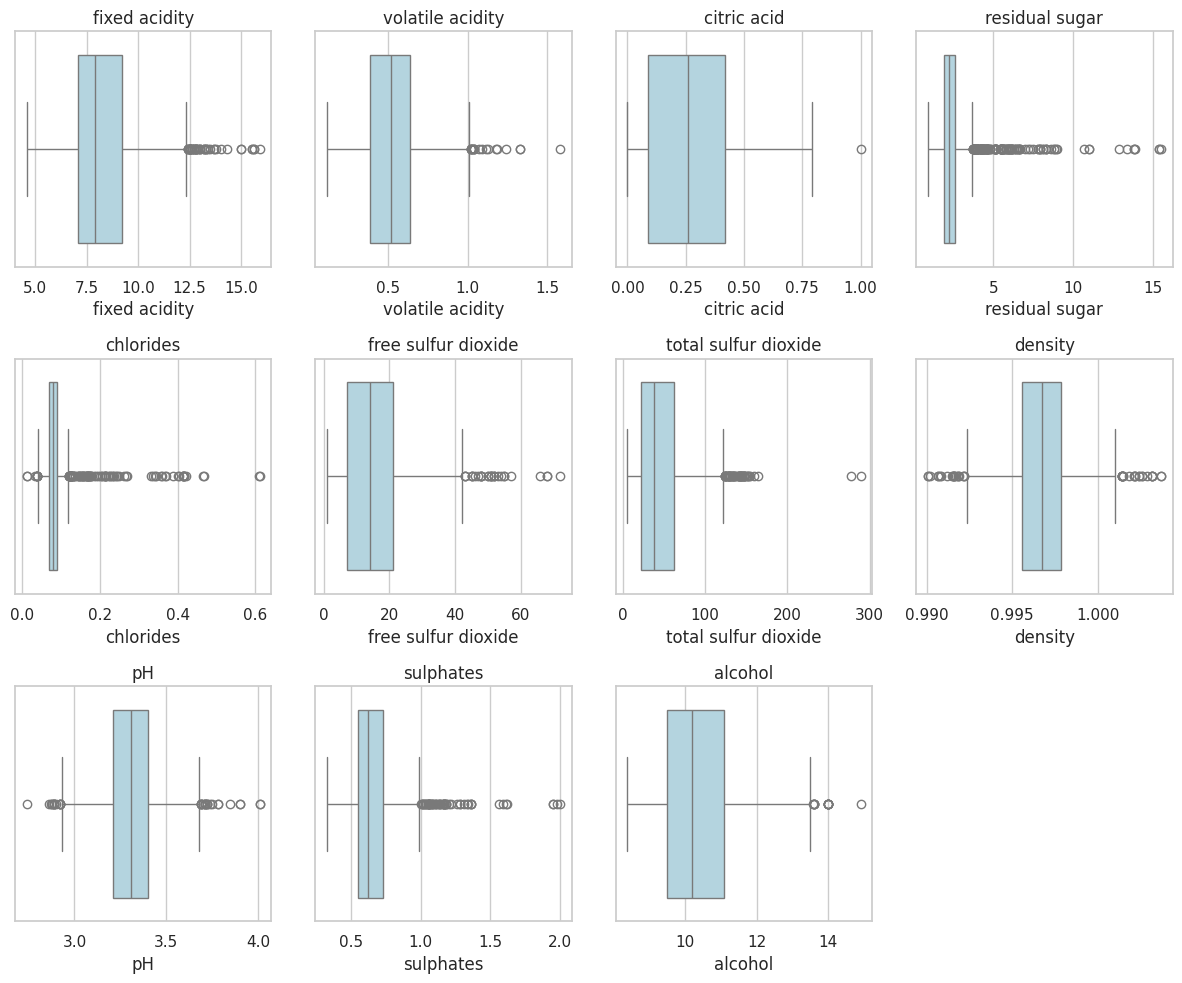

In [186]:
# Create box plots for each feature
plt.figure(figsize=(12, 10))


features = data.columns[:-1]

for i, feature in enumerate(features):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=data[feature], color='lightblue')
    plt.title(feature)

plt.tight_layout()
plt.show()


# Key Observations from the Box Plots:
* Fixed Acidity:

Most values fall between 5 and 15, with a few outliers above 15.
This indicates that the fixed acidity is relatively well-distributed but with a few extreme values.
* Volatile Acidity:

The majority of the values are between 0.1 and 1, but there are several outliers, especially above 1.
Volatile acidity tends to have more variation, and the outliers might indicate wines with unusual characteristics.
* Citric Acid:

Most values are concentrated between 0.0 and 0.5.
The dataset shows a few wines with very high citric acid levels, but the majority are within the lower range.
* Residual Sugar:

Residual sugar is highly skewed, with most values concentrated near the lower range (around 2 to 3), but there are some extreme outliers with values up to 15.
This suggests the presence of some sweet wines, though the majority are dry.
* Chlorides:

Chlorides show a tight distribution, with most values between 0 and 0.2, but there are a few outliers above 0.2.
It seems that chlorides are generally low across the wines.
* Free Sulfur Dioxide:

The values are mostly between 0 and 60, with some wines having significantly higher values, reaching up to 70.
The range of free sulfur dioxide suggests it is used as a preservative but varies among wines.
* Total Sulfur Dioxide:

The distribution is skewed to the right, with most values between 0 and 100, but a few wines have very high values.
Total sulfur dioxide seems to vary quite a bit, similar to free sulfur dioxide.
* Density:

Most values fall between 0.99 and 1.00, which is typical for wine.
There are no significant outliers for this feature.
* pH:

Most wines have a pH between 3 and 3.5, and there are a few wines with values above 3.5.
pH levels are fairly consistent across wines.
* Sulphates:

Sulphates are concentrated between 0.5 and 1.5, with a few outliers above 1.5.
Similar to chlorides, sulphates are used in smaller quantities, with a few wines containing higher amounts.
* Alcohol:

Alcohol content is mainly between 9 and 13, with outliers above 13.
This indicates that most wines have moderate alcohol content, with a few wines having higher concentrations.

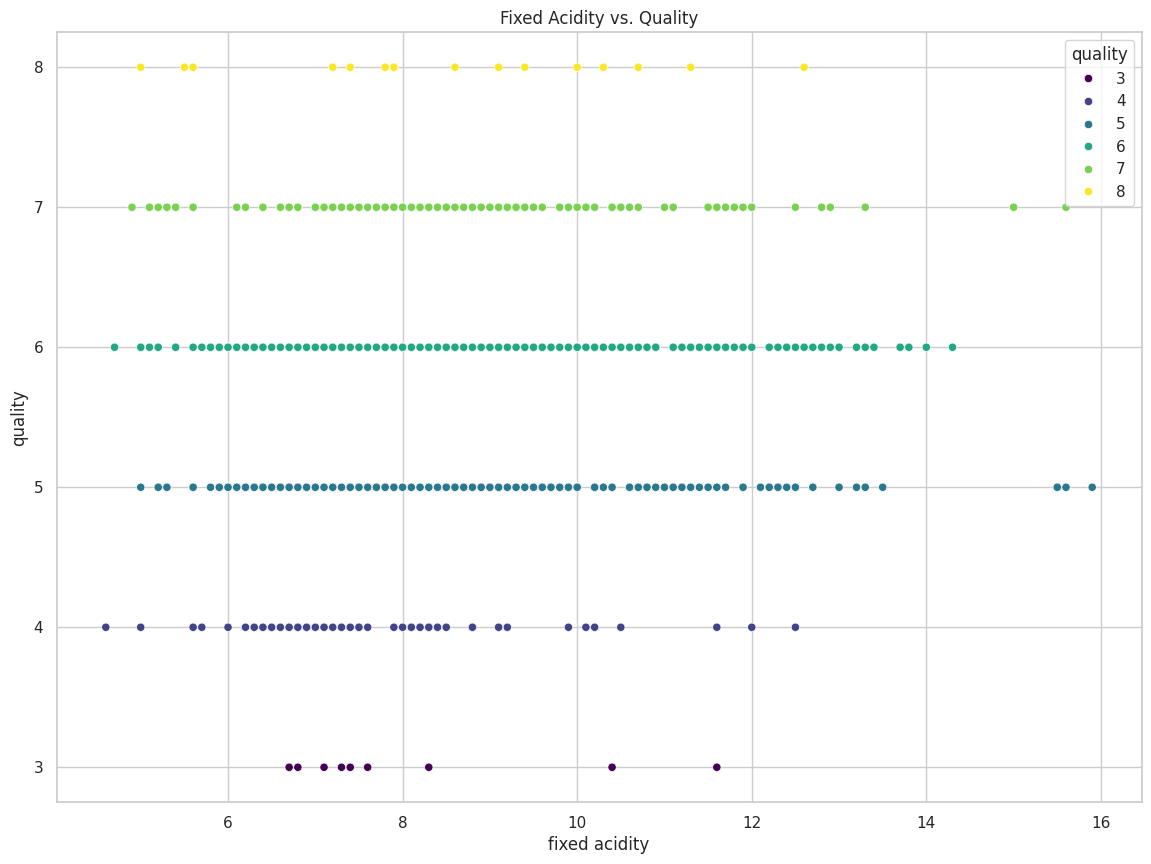

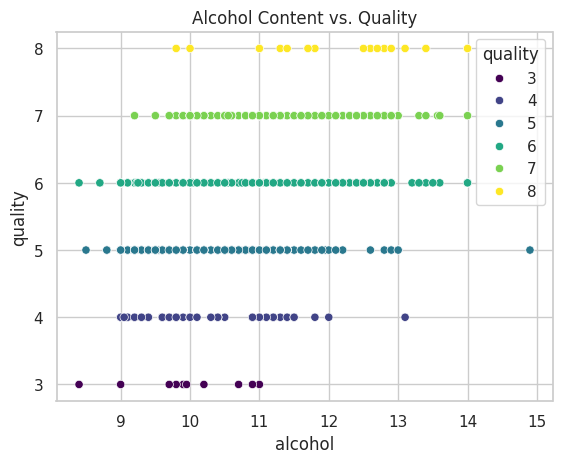

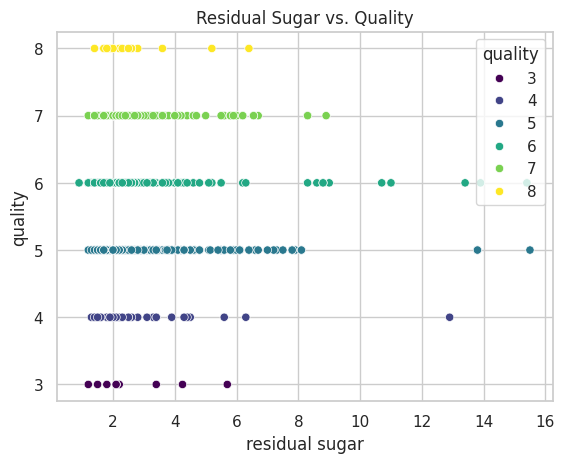

In [187]:
# Scatter plots for selected features vs. Quality
plt.figure(figsize=(14, 10))

#  relationship between features and wine quality
sns.scatterplot(data, x='fixed acidity', y='quality', hue='quality', palette='viridis')
plt.title('Fixed Acidity vs. Quality')
plt.show()

sns.scatterplot(data, x='alcohol', y='quality', hue='quality', palette='viridis')
plt.title('Alcohol Content vs. Quality')
plt.show()

sns.scatterplot(data, x='residual sugar', y='quality', hue='quality', palette='viridis')
plt.title('Residual Sugar vs. Quality')
plt.show()


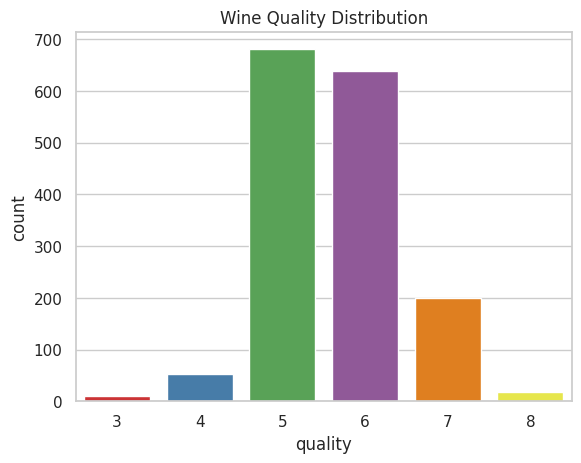

In [188]:
# countplot for the quality distribution
sns.countplot(data,x='quality', palette='Set1')
plt.title('Wine Quality Distribution')
plt.show()


* Histograms:  observe the distribution of each feature and identify if any feature has skewed data, which might need transformation or scaling.
* Heatmap:   see which features are most correlated with the target variable quality and with each other. This can help in feature selection.
* Box Plots:   be able to identify any outliers in the data.
* Scatter Plots:  see the relationship between specific features (e.g., acidity, alcohol, residual sugar) and quality. This can help identify important predictors.
* Pairplot:   examine how all features relate to one another and to the target variable. Clusters or trends in the data can give insights into the model’s decision-making.
* Quality Distribution:   observe how the quality ratings are distributed in the dataset (e.g., most wines have a quality of 5 or 6).

In [189]:
# skewness
skewness = data.skew()
skewness

,0
fixed acidity,0.982751
volatile acidity,0.671593
citric acid,0.318337
residual sugar,4.540655
chlorides,5.680347
free sulfur dioxide,1.250567
total sulfur dioxide,1.515531
density,0.071288
pH,0.193683
sulphates,2.428672


In [190]:
from scipy import stats
data['residual sugar'] = np.log1p(data['residual sugar'])
data['chlorides'], _ = stats.boxcox(data['chlorides'] + 1)
data['sulphates'] = np.log1p(data['sulphates'])
data['free sulfur dioxide'] = np.log1p(data['free sulfur dioxide'])
data['total sulfur dioxide'] = np.log1p(data['total sulfur dioxide'])


In [191]:

data.skew()


,0
fixed acidity,0.982751
volatile acidity,0.671593
citric acid,0.318337
residual sugar,2.255076
chlorides,-0.151304
free sulfur dioxide,-0.097399
total sulfur dioxide,-0.035746
density,0.071288
pH,0.193683
sulphates,1.610497


In [192]:
# Detecting outliers using the IQR method
def find_outliers_iqr(data):
    outliers = {}
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
        outliers[column] = outlier_count
    return outliers


iqr_outliers = find_outliers_iqr(data)

print("Outlier counts using IQR:")
for column, count in iqr_outliers.items():
    print(f"{column}: {count} outliers")




Outlier counts using IQR:
fixed acidity: 49 outliers
volatile acidity: 19 outliers
citric acid: 1 outliers
residual sugar: 138 outliers
chlorides: 118 outliers
free sulfur dioxide: 0 outliers
total sulfur dioxide: 1 outliers
density: 45 outliers
pH: 35 outliers
sulphates: 52 outliers
alcohol: 13 outliers
quality: 28 outliers


In [193]:
from sklearn.preprocessing import RobustScaler
def cap_outliers(data):
    capped_data = data.copy()
    for column in data.columns:
        lower_bound = data[column].quantile(0.01)
        upper_bound = data[column].quantile(0.99)
        capped_data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return capped_data


df = cap_outliers(data)

X = df.drop(columns='quality')
y = df['quality']


scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

df_scaled = pd.concat([X_scaled, y], axis=1)
print("Outliers have been capped, and features have been scaled.")
df_scaled.head()




Outliers have been capped, and features have been scaled.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.238095,0.72,-0.787879,-0.455271,-0.156028,-0.220585,-0.107393,0.469799,1.052632,-0.343511,-0.50,5
1,-0.047619,1.44,-0.787879,0.544729,0.815579,0.543738,0.551731,0.022371,-0.578947,0.331017,-0.25,5
2,-0.047619,0.96,-0.666667,0.142314,0.587129,0.063798,0.341165,0.111857,-0.263158,0.167013,-0.25,5
3,1.571429,-0.96,0.909091,-0.455271,-0.209939,0.180231,0.443920,0.559284,-0.789474,-0.227561,-0.25,6
4,-0.238095,0.72,-0.787879,-0.455271,-0.156028,-0.220585,-0.107393,0.469799,1.052632,-0.343511,-0.50,5


In [194]:
# Print the column names to verify if 'quality' is present
print(df.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [195]:
df_scaled["quality"]

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [196]:
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.238095,0.72,-0.787879,-0.455271,-0.156028,-0.220585,-0.107393,0.469799,1.052632,-0.343511,-0.50,5
1,-0.047619,1.44,-0.787879,0.544729,0.815579,0.543738,0.551731,0.022371,-0.578947,0.331017,-0.25,5
2,-0.047619,0.96,-0.666667,0.142314,0.587129,0.063798,0.341165,0.111857,-0.263158,0.167013,-0.25,5
3,1.571429,-0.96,0.909091,-0.455271,-0.209939,0.180231,0.443920,0.559284,-0.789474,-0.227561,-0.25,6
4,-0.238095,0.72,-0.787879,-0.455271,-0.156028,-0.220585,-0.107393,0.469799,1.052632,-0.343511,-0.50,5


# Data Splitting

In [197]:
# Separate features (X) and target (y)
X = df_scaled.drop(columns='quality')
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


# Train-Test Split

In [198]:
X_train, X_test , y_train, y_test =train_test_split(X,y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


# Model Training

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Load your data here
# df = pd.read_csv('your_data.csv')

# Convert quality to categorical classification (3 categories: low, medium, high)
def categorize_quality(value):
    if value <= 4:
        return 0  # Low Quality
    elif value == 5:
        return 1  # Medium Quality
    else:
        return 2  # High Quality

# Apply the categorization function to the 'quality' column
df['quality'] = df['quality'].apply(categorize_quality)

# Separate the features (X) and target variable (y)
X = df.drop(columns='quality')  # Features
y = df['quality']  # Target (Quality category)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression Model
log_reg = LogisticRegression(max_iter=200, multi_class='ovr', solver='liblinear')  # 'ovr' is used for multi-class problems

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Logistic Regression Accuracy: 0.715625
Confusion Matrix:
[[  0   8   3]
 [  0  93  37]
 [  0  43 136]]


In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)


Decision Tree Accuracy: 0.69375
Confusion Matrix:
[[  0   5   6]
 [  6  85  39]
 [  5  37 137]]


In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)


KNN Accuracy: 0.7125
Confusion Matrix:
[[  2   7   2]
 [  3  88  39]
 [  0  41 138]]


In [202]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)


SVM Accuracy: 0.715625
Confusion Matrix:
[[  0   9   2]
 [  0  99  31]
 [  0  49 130]]


In [203]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)


XGBoost Accuracy: 0.7875
Confusion Matrix:
[[  0   8   3]
 [  1 100  29]
 [  0  27 152]]


In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)


Random Forest Accuracy: 0.784375
Confusion Matrix:
[[  0   7   4]
 [  0  98  32]
 [  0  26 153]]


#  Saving model

In [205]:
import joblib
joblib.dump(rf_model, 'rf_model.joblib')

print("Model saved as rf_model.joblib")

Model saved as rf_model.joblib


In [207]:
from google.colab import files


files.download('rf_model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>